In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded = files.upload()
     


Saving Fish.csv to Fish.csv


In [4]:
df = pd.read_csv("Fish.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [21]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


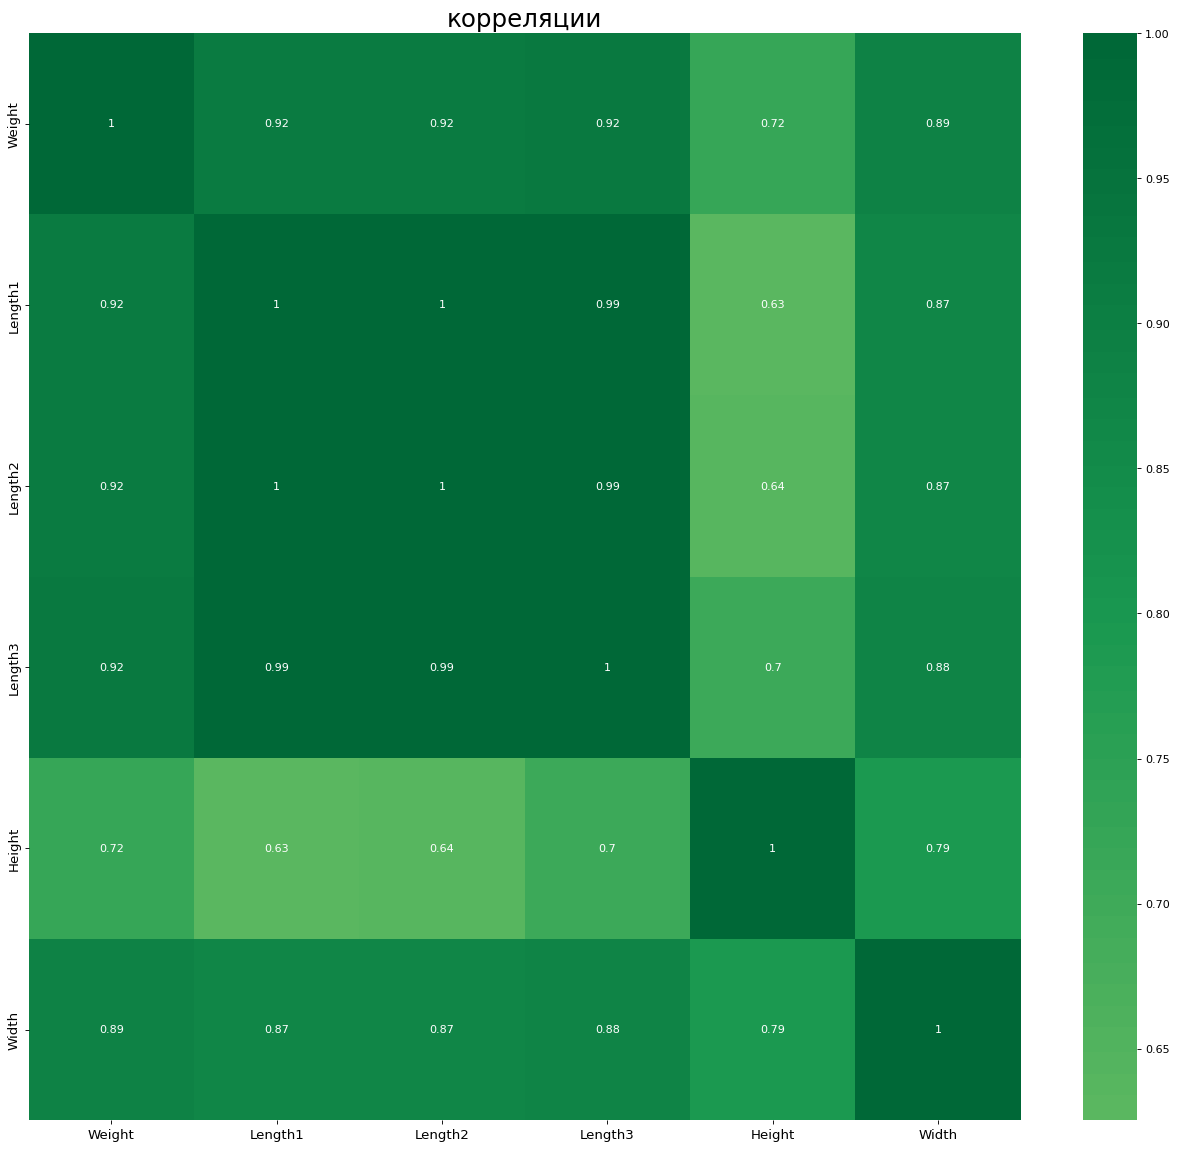

In [5]:
plt.figure(figsize=(20,18), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True) 
plt.title(label='Корреляции в данных', fontsize=22) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()
     


In [7]:
y = df['Weight']
x = df.drop(columns=["Weight", "Species"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
print('y =', ' + '.join([ str(x) + "*x" + str(i)   for i, x in  enumerate(model.coef_)]), "+", model.intercept_ )

y = 53.95593132211247*x0 + 14.16443301593769*x1 + -38.56585714214733*x2 + 33.329712598419476*x3 + -3.9472034468488197*x4 + -504.45245854667024


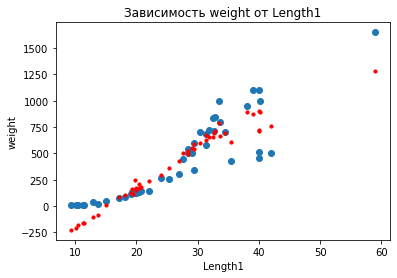

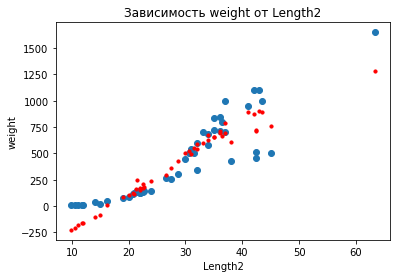

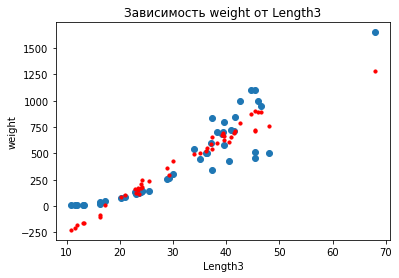

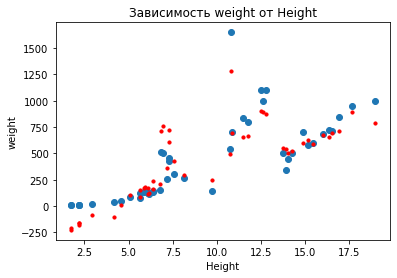

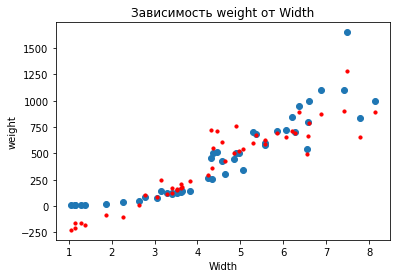

In [22]:
y_pred = model.predict(x_test)
for column in x_test.columns:
  plt.xlabel(column)
  plt.title(f"Зависимость weight от {column}")
  plt.ylabel("weight")
  plt.scatter(x_test[column], y_test)
  plt.scatter(x_test[column], y_pred, color='red', s=10)
  plt.show()

In [23]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 108.18369841700786
Mean Squared Error: 19203.466508411995
R2 score: 0.8647554034664008
